In [1]:
import cv2
from cv2 import dnn_superres

In [2]:
# links to download models
# https://github.com/Saafke/EDSR_Tensorflow/blob/master/models/
# https://github.com/fannymonori/TF-LapSRN/blob/master/export/LapSRN_x8.pb

In [3]:
# Ensure opencv-contrib-python is installed
# %pip install --upgrade opencv-contrib-python

# initialize super resolution object
from pathlib import Path
sr = dnn_superres.DnnSuperResImpl_create()

# read the model
path = 'EDSR_x4.pb'
sr.readModel(path)

sr.setModel('edsr', 4)
print('Model loaded and set successfully!')

Model loaded and set successfully!


In [4]:
lr_image_file_name = "CT_Scan"
lr_path = "image_dataset/" 
edsr_output = "image_dataset/output/" + lr_image_file_name + "edsr_x4.jpg"
# lapsrn_output = "dataimage_datasetset/output/" + lr_image_file_name + "lapsrn_x8.jpg"

image_lr = lr_path + lr_image_file_name + ".jpg"
image = cv2.imread(image_lr)

In [5]:
# upsample the image
upscaled = sr.upsample(image)
# save the upscaled image
cv2.imwrite(edsr_output, upscaled)

True

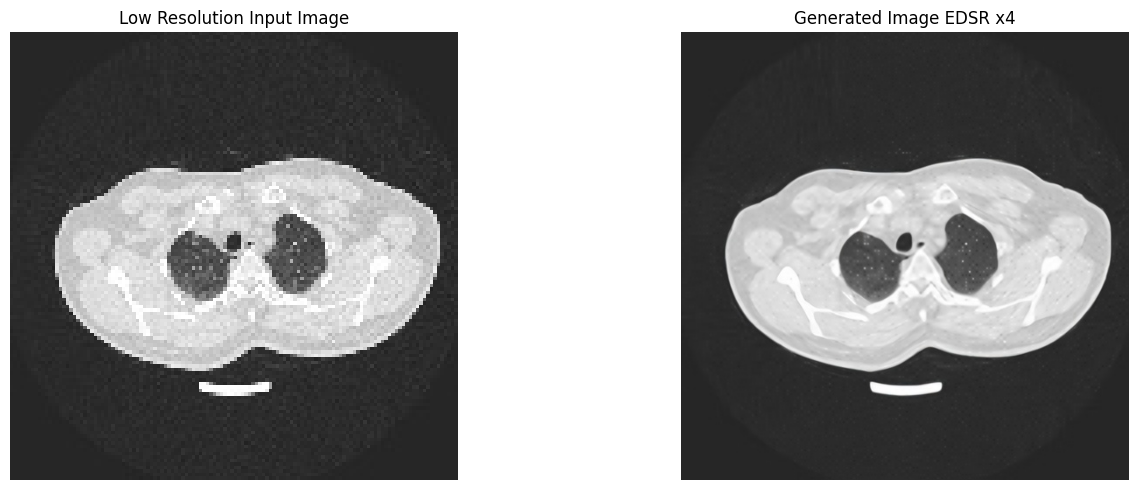

In [6]:
import matplotlib.pyplot as plt

# Read images using OpenCV
img_lr = cv2.imread(image_lr)
img_edsr = cv2.imread(edsr_output)


# Check if images are loaded properly
if img_lr is None:
    raise FileNotFoundError(f'Low resolution image not found: {image_lr}')
if img_edsr is None:
    raise FileNotFoundError(f'EDSR output image not found: {edsr_output}')


# Convert BGR to RGB for matplotlib
img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
img_edsr = cv2.cvtColor(img_edsr, cv2.COLOR_BGR2RGB)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img_lr)
axs[0].set_title('Low Resolution Input Image')
axs[0].axis('off')

axs[1].imshow(img_edsr)
axs[1].set_title('Generated Image EDSR x4')
axs[1].axis('off')



plt.tight_layout()
plt.show()